In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston
import pandas as pd
import scipy.stats as statss

In [2]:
boston = load_boston()

In [3]:
type(boston)

sklearn.utils.Bunch

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
boston.data.shape

(506, 13)

In [6]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
l = list(boston.feature_names) 
l

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [8]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [9]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
bos.shape

(506, 13)

In [11]:
bos.columns = boston.feature_names

In [12]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
bos['PRICE'] = boston.target

In [14]:
data = bos.head()

In [15]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
x = bos.drop(['PRICE'], axis = 1)
# axis = 1 hace referencia a las columnas y axis = 0 hace referencia a las filas

In [17]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
lm = LinearRegression()

lm.fit()  ------->  se ajusta a un modelo lineal
lm.predict()  --->  Predice Y utilizando el modelo lineal con coeficientes estimados
lm.score() ------>  Devuelve el coeficiente de determinación (R ^ 2). Una medida de qué tan bien los resultados observados son replicados por el modelo, como la proporción de la variación total de los resultados explicada por el modelo.
.coef_ gives the coefficients and .intercept_ gives the estimated intercepts.

In [19]:
lm.fit(x, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
lm.intercept_
#

36.49110328036135

In [21]:
lm.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

## Como usar ZIP

In [23]:
name = [ "Manjeet", "Nikhil", "Shambhavi", "Astha" ] 
roll_no = [ 4, 1, 3, 2 ] 
marks = [ 40, 50, 60, 70 ] 
  
# using zip() to map values 
mapped = zip(name, roll_no, marks) 
  
# converting values to print as set 
mapped = set(mapped) 
  
# printing resultant values  
#print ("The zipped result is : ",end="") 
#print (mapped)
#pd.DataFrame(list(zip(marks, roll_no)), columns = [ "Manjeet", "Nikhil", "Shambhavi", "Astha" ] )

In [24]:
columns = ['features', 'estimateCoefficients']
pd.DataFrame(list(zip(x.columns, lm.coef_)), columns = ['features', 'estimateCoefficients'])
#w = pd.DataFrame(list(zip(x.columns, lm.coef_)), columns=['annual_income', 'outlier'])
#w

,features,estimateCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


Como se puede ver en el marco de datos, existe una alta correlación entre la RM y los precios. Permite trazar un diagrama de dispersión entre los precios de la vivienda real y la RM real.

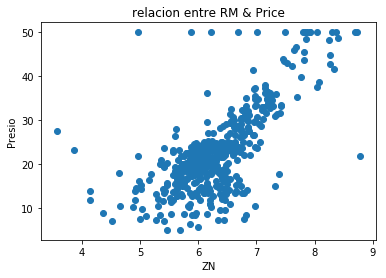

In [25]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel('ZN')
plt.ylabel('Presio')
plt.title('relacion entre RM & Price')
plt.show()

## Voy a calcular los precios predichos (Y ^ i) usando lm.predecir. Luego muestro los primeros 5 precios de la vivienda. Estos son mis precios de vivienda previstos.

In [26]:
l = lm.predict(x)
len(l)

506

In [27]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


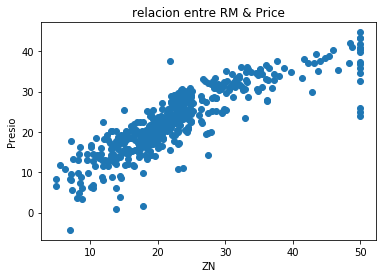

In [28]:
plt.scatter(bos.PRICE, l)
plt.xlabel('ZN')
plt.ylabel('Presio')
plt.title('relacion entre RM & Price')
plt.show()

## mean squared error

Puede notar que hay algún error en la predicción a medida que aumentan los precios de la vivienda.



In [29]:
mseFull = np.mean((bos.PRICE - lm.predict(x)) ** 2 )

In [30]:
mseFull

21.897779217687496

In [31]:
lm = LinearRegression()
lm.fit(x[['PTRATIO']], bos.PRICE)
mseFull = np.mean((bos.PRICE - lm.predict(x[['PTRATIO']])) ** 2 )
print(mseFull)

62.65220001376927


In [32]:
lm = LinearRegression()
lm.fit(x[['NOX']], bos.PRICE)
mseFull = np.mean((bos.PRICE - lm.predict(x[['NOX']])) ** 2 )
print(mseFull)

69.00428835540674


In [33]:
lm = LinearRegression()
lm.fit(x[['RM']], bos.PRICE)
mseFull = np.mean((bos.PRICE - lm.predict(x[['RM']])) ** 2 )
print(mseFull)

43.60055177116958


In [34]:
lm = LinearRegression()
lm.fit(x[['CHAS']], bos.PRICE)
mseFull = np.mean((bos.PRICE - lm.predict(x[['CHAS']])) ** 2 )
print(mseFull)

81.82651411931553


In [35]:
from sklearn import metrics

metrics.mean_squared_error(bos.PRICE, lm.predict(x))

ValueError: shapes (506,13) and (1,) not aligned: 13 (dim 1) != 1 (dim 0)